In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
from sklearn import linear_model
from sklearn import model_selection

plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 18})

In [13]:
A = np.random.randn(100,10) # Matrix of possible predictors
x = np.array([0, 0, 1, 0, 0, 0, -1, 0, 0, 0]) #Two nonzero predictors
b = A @ x + 2*np.random.randn(100)

xL2 = np.linalg.pinv(A) @ b

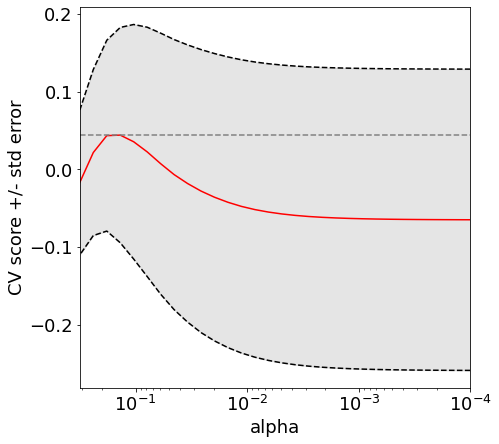

In [14]:
reg = linear_model.LassoCV(cv=10).fit(A, b)

lasso = linear_model.Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]

clf = model_selection.GridSearchCV(lasso, tuned_parameters, cv=10, refit=False)
clf.fit(A, b)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores,'r-')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(10)

plt.semilogx(alphas, scores + std_error, 'k--')
plt.semilogx(alphas, scores - std_error, 'k--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.1,color='k')

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[-1], alphas[0]])

plt.show()

In [15]:
XL1 = linear_model.Lasso(alpha=clf.best_params_['alpha'])
XL1.fit(A,b)
xL1 = XL1.coef_
xL1DeBiased = np.linalg.pinv(A[:,np.abs(xL1)>0]) @ b